# Modelling

For any modeling exercise in sklearn, the following steps are required:

0. **Dataset Preparation:** This initial step involves collecting, cleaning, and organizing the data to be used for modeling. It includes tasks such as data collection, data cleaning (handling missing values, removing duplicates, etc.), data transformation (feature engineering, scaling, encoding categorical variables, etc.), and splitting the data into training and testing sets.
1. **Model Instantiation:** In this step, you select the appropriate model class or algorithm class to use for your specific problem. This involves choosing from a variety of machine learning or statistical models such as linear regression, decision trees, neural networks, etc. Additionally, you set up the parameters and configuration of the model.

2. **Model Fine-tuning or Fitting or Training:** Once the model is instantiated, it needs to be trained on the prepared dataset. During training, the model learns the patterns and relationships within the data. This involves feeding the training data into the model and adjusting the model's parameters iteratively to minimize the difference between the actual values and the predicted values. The goal is to optimize the model's performance on the training data.

3. **Model Predictions:** After the model has been trained, it can be used to make predictions on new, unseen data. In this step, you provide new input data to the trained model, and it outputs predictions based on the patterns it learned during training. This is typically done using the predict function/method provided by most machine learning libraries.

4. **Model Evaluation:** Once predictions have been generated, it's essential to evaluate the performance of the model to assess how well it generalizes to new, unseen data. Various evaluation metrics can be used depending on the type of problem (classification, regression, etc.) and the specific requirements of the application. Common evaluation metrics include accuracy, precision, recall, F1-score for classification tasks, and metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared for regression tasks. This step helps in understanding how well the model is performing and whether any further adjustments or improvements are necessary.

# SKLEARN = CRAZY LEVELS OF ABSTRACTION
`scikit-learn`, often abbreviated as `sklearn`, is a popular machine learning library in Python. It provides simple and efficient tools for data analysis and data modeling, built on NumPy, SciPy, and matplotlib.

In [ ]:
# Step 0: Dataset Preparation
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset (example using Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 1: Model Instantiation
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Instantiate Support Vector Classifier
model = LogisticRegression()


# Step 2: Model Fitting or Training
# Train the model on the training data
model.fit(X_train, y_train) # features, target_value


# Step 3: Model Predictions
# Make predictions on the testing data
y_pred = model.predict(X_test)


# Step 4: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred) # actual values, predicted values
print("Accuracy:", accuracy)

# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
help(SVC)

# The Fit Method

Scikit-learn provides dozens of built-in machine learning algorithms and models, called estimators. Each estimator can be fitted to some data using its fit method.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1,  2,  3],  # 2 samples, 3 features
     [11, 12, 13]]
y = [0, 1]  # classes of each sample
clf.fit(X, y)

RandomForestClassifier(random_state=0)

The fit method generally accepts 2 inputs:

* The **samples matrix** (or feature matrix) `X`. The size of X is typically (n_samples, n_features), which means that samples are represented as rows and features are represented as columns.

* The **target** values `y` which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervised learning tasks, y does not need to be specified. y is usually a 1d array where the i th entry corresponds to the target of the i th sample (row) of X.

Both X and y are usually expected to be numpy arrays or equivalent array-like data types, though some estimators work with other formats such as sparse matrices.

Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator.

In [ ]:
clf.predict(X)  # predict classes of the training data
clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data

array([0, 1])

Each estimator class has its own fit function: https://scikit-learn.org/stable/search.html?q=fit

Each estimator class has its own predict function: https://scikit-learn.org/stable/search.html?q=predict

# Let's learn by example!

## sklearn Preprocesssing

### Scaling Numerical Variables

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Sample data
train_data = np.array([[1, 2], [3, 4], [5, 6]])
test_data = np.array([[10, 20], [30, 40], [50, 60]])


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(train_data)

# Transform the data
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

print("Original data:")
print(train_data)
print("\nScaled data (standardized):")
print(scaled_train_data, "\n")
print(scaled_test_data)



data = np.array([[1, 2], [3, 4], [5, 6]])
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(data)

# Transform the data
scaled_data = scaler.transform(data)

print("Original data:")
print(data)
print("\nScaled data (Min-Max scaled):")
print(scaled_data)

Original data:
[[1 2]
 [3 4]
 [5 6]]

Scaled data (standardized):
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]] 

[[ 4.28660705  9.79795897]
 [16.53405576 22.04540769]
 [28.78150448 34.2928564 ]]
Original data:
[[1 2]
 [3 4]
 [5 6]]

Scaled data (Min-Max scaled):
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


### Handling categorical variables

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Sample categorical data
data = np.array([['red'], ['green'], ['blue'], ['red']])

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(data).toarray()

print("Original data:")
print(data)
print("\nOne-hot encoded data:")
print(encoded_data)


# Sample categorical data
data = np.array(['red', 'green', 'blue', 'red'])
                # 2,      1,      0,      2

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
encoded_labels = encoder.fit_transform(data)

print("Original data:")
print(data)
print("\nEncoded labels:")
print(encoded_labels)

Original data:
[['red']
 ['green']
 ['blue']
 ['red']]

One-hot encoded data:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Original data:
['red' 'green' 'blue' 'red']

Encoded labels:
[2 1 0 2]


In [ ]:
# https://ishanjainoffical.medium.com/understanding-weight-of-evidence-woe-with-python-code-cd0df0e4001e

### Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Sample data with missing values
data = np.array([[1, 2], [np.nan, 4], [5, np.nan], [8, 9]])

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='median')  # Other strategies: mean, most_frequent

# Fit and transform the data
imputed_data = imputer.fit_transform(data)

print("Original data:")
print(data)
print("\nImputed data:")
print(imputed_data)

Original data:
[[ 1.  2.]
 [nan  4.]
 [ 5. nan]
 [ 8.  9.]]

Imputed data:
[[1. 2.]
 [5. 4.]
 [5. 4.]
 [8. 9.]]


In [ ]:
from sklearn.impute import KNNImputer
import numpy as np

# Sample data with missing values
data = np.array([[1, 2], [np.nan, 4], [5, np.nan], [8, 9]])

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=1)

# Fit and transform the data
imputed_data = imputer.fit_transform(data)

print("Original data:")
print(data)
print("\nImputed data using KNNImputer:")
print(imputed_data)

Original data:
[[ 1.  2.]
 [nan  4.]
 [ 5. nan]
 [ 8.  9.]]

Imputed data using KNNImputer:
[[1. 2.]
 [1. 4.]
 [5. 9.]
 [8. 9.]]


## Classification Example using Logistic Regression

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0


## Regression Example using Random Forest

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse)

Random Forest MSE: 0.2553684927247781


## Clustering Example using KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


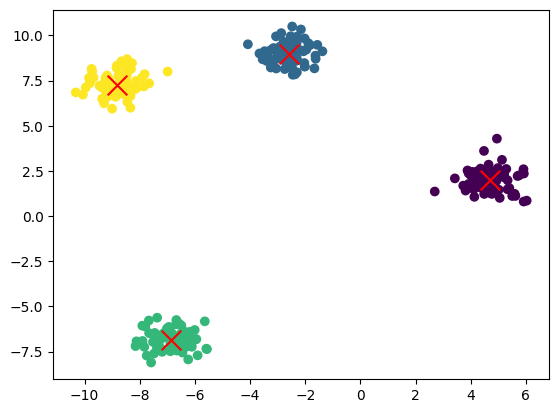

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Create KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model
kmeans.fit(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
plt.show()

## Dimensionality Reduction Example using PCA

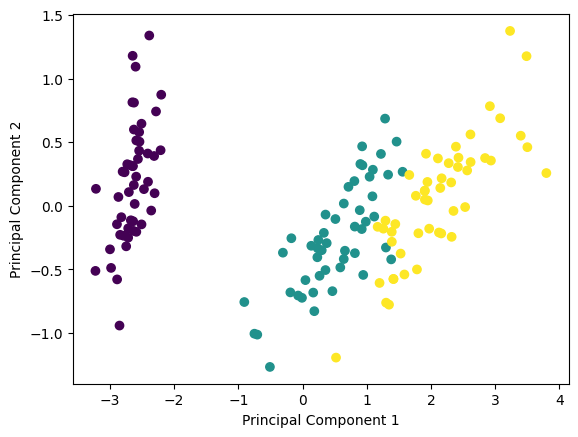

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# APPLY K-MEANS AFTER THIS

## Text Classification Example using Naive Bayes

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, newsgroups_train.target)

# Evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(newsgroups_test.target, y_pred)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.8348868175765646


## Model Based Feature Selection

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

To get an idea of the importance of the features, we are going to use the RidgeCV estimator. The features with the highest absolute coef_ value are considered the most important

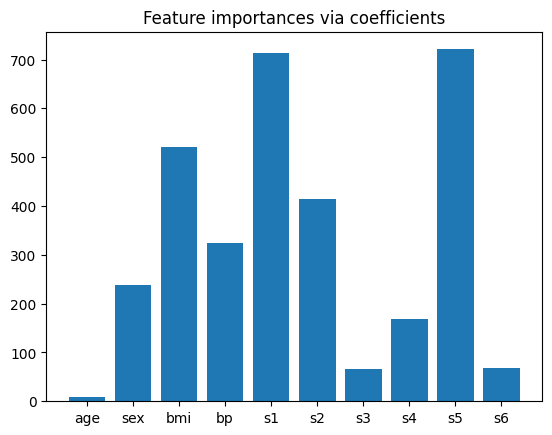

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from time import time

from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-5] + 0.01
print(threshold)

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

323.8327452196078
Features selected by SelectFromModel: ['bmi' 's1' 's2' 's5']
Done in 0.004s


## Using different SVM kernels

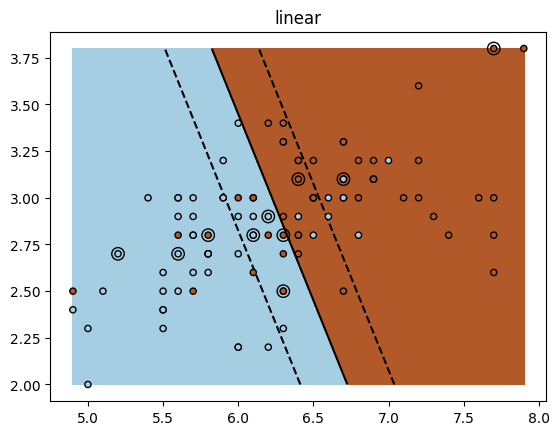

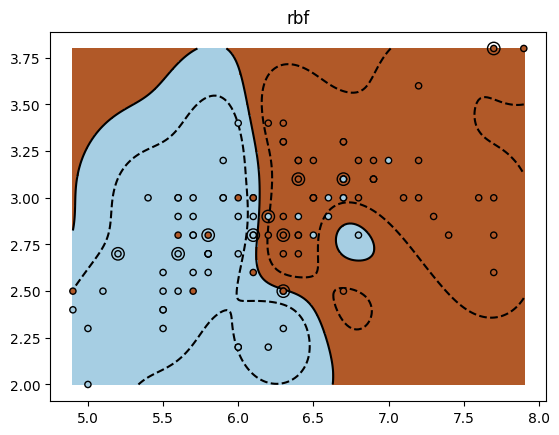

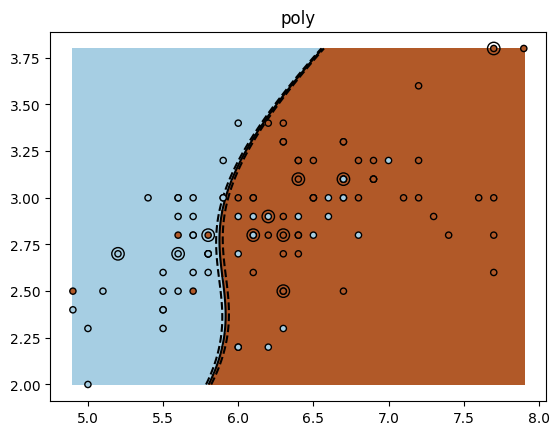

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()